In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

from glob import glob

In [2]:
files = glob("data/avg*")

dfs = [pd.read_csv(file) for file in files]
df = pd.concat(dfs).reset_index(drop=True)
df['czas'] = pd.to_datetime(df['czas'].map(lambda x: x.split('+')[0]))

target = pd.read_csv("data/temp_zuz.csv", sep=";")
target["czas"] = pd.to_datetime(target["Czas"].map(lambda x: x.split('+')[0]))
target = target.drop(columns=["Czas"])

In [3]:
names = {
    "001tir01363.daca.pv": "woda_powrotna_kolektora_kz13",
    "001fir01313.daca.pv": "woda_chłodząca_do_kolektor_kz13",
    "001tir01365.daca.pv": "woda_powrotna_kolektora_kz15",
    "001fir01315.daca.pv": "woda_chłodząca_do_kolektor_kz15",
    "001tir01362.daca.pv": "woda_powrotna_kolektora_kz12",
    "001fir01312.daca.pv": "woda_chłodząca_do_kolektor_kz12",
    "001tir01361.daca.pv": "woda_powrotna_kolektora_kz11",
    "001fir01311.daca.pv": "woda_chłodząca_do_kolektor_kz11",
    "001tir01360.daca.pv": "woda_powrotna_kolektora_kz10",
    "001fir01310.daca.pv": "woda_chłodząca_do_kolektor_kz10",
    "001tir01359.daca.pv": "woda_powrotna_kolektora_kz9",
    "001fir01309.daca.pv": "woda_chłodząca_do_kolektor_kz9",
    "001tir01358.daca.pv": "woda_powrotna_kolektora_kz8",
    "001fir01308.daca.pv": "woda_chłodząca_do_kolektor_kz8",
    "001tir01357.daca.pv": "woda_powrotna_kolektora_kz7",
    "001fir01307.daca.pv": "woda_chłodząca_do_kolektor_kz7",
    "037tix00254.daca.pv": "temp._wody_zasil.obieg_pz_1",
    "037tix00264.daca.pv": "temp._wody_zasil.obieg_pz_2",
    "001fcx00211.pv": "reg_nadawy_koncentratu_liw1",
    "001fcx00221.pv": "reg_nadawy_koncentratu_liw2",
    "001fcx00241.pv": "reg_pyl_zwrot_liw4",
    "001fcx00231.pv": "reg_koncentrat_prazony_liw3",
    "001tix01079.daca.pv": "temp17_pod_2_warstwą_wymurówki",
    "001tix01080.daca.pv": "temp18_pod_2_warstwą_wymurówki",
    "001tix01081.daca.pv": "temp19_pod_2_warstwą_wymurówki",
    "001tix01082.daca.pv": "temp20_pod_2_warstwą_wymurówki",
    "001tix01083.daca.pv": "temp21_pod_2_warstwą_wymurówki",
    "001tix01084.daca.pv": "temp22_pod_2_warstwą_wymurówki",
    "001tix01085.daca.pv": "temp23_pod_2_warstwą_wymurówki",
    "001tix01086.daca.pv": "temp24_pod_2_warstwą_wymurówki",
    "001tix01071.daca.pv": "temp9_pod_2_warstwą_wymurówki",
    "001tix01072.daca.pv": "temp10_pod_2_warstwą_wymurówki",
    "001tix01073.daca.pv": "temp11_pod_2_warstwą_wymurówki",
    "001tix01074.daca.pv": "temp12_pod_2_warstwą_wymurówki",
    "001tix01075.daca.pv": "temp13_pod_2_warstwą_wymurówki",
    "001tix01076.daca.pv": "temp14_pod_2_warstwą_wymurówki",
    "001tix01077.daca.pv": "temp15_pod_2_warstwą_wymurówki",
    "001tix01078.daca.pv": "temp16_pod_2_warstwą_wymurówki",
    "001tix01063.daca.pv": "temp1_pod_2_warstwą_wymurówki",
    "001tix01064.daca.pv": "temp2_pod_2_warstwą_wymurówki",
    "001tix01065.daca.pv": "temp3_pod_2_warstwą_wymurówki",
    "001tix01066.daca.pv": "temp4_pod_2_warstwą_wymurówki",
    "001tix01067.daca.pv": "temp5_pod_2_warstwą_wymurówki",
    "001tix01068.daca.pv": "temp6_pod_2_warstwą_wymurówki",
    "001tix01069.daca.pv": "temp7_pod_2_warstwą_wymurówki",
    "001tix01070.daca.pv": "temp8_pod_2_warstwą_wymurówki",
    "prob_corg": "prob_corg",
    "prob_s": "prob_s",
    "prob_fe": "prob_fe",
    "prazonka_fe": "prażona_mieszanina_koncentratów_hg1_fe",
    "prazonka_s": "prażona_mieszanina_koncentratów_hg1_sog",
    "001uxm0rf01.daca.pv": "went_rf01_odcz_zad_obrotów",
    "001uxm0rf02.daca.pv": "went_rf02_odcz_zad_obrotów",
    "001uxm0rf03.daca.pv": "went_rf03_odcz_zad_obrotów",
    "001nir0szr0.daca.pv": "sumaryczna_moc_cieplna_odebrana_całkowita",
    "001txi01153.daca.pv": "temp_na_kol_kan_1-34",
    "001txi01154.daca.pv": "temp_na_kol_kan_35-68",
}
names = {k.lower(): v.lower().replace(" ", "_") for k, v in names.items()}
df = df.rename(names, axis="columns")


In [4]:
df_merged = pd.merge(df, target, on="czas")

In [5]:
to_drop = [
    "woda_chłodząca_do_kolektor_kz9",
    "woda_chłodząca_do_kolektor_kz10",
    "woda_chłodząca_do_kolektor_kz11",
    "woda_chłodząca_do_kolektor_kz12",
    "woda_powrotna_kolektora_kz8",
    "woda_powrotna_kolektora_kz9",
    "woda_powrotna_kolektora_kz10",
    "woda_powrotna_kolektora_kz11",
    "woda_powrotna_kolektora_kz12",
    "woda_powrotna_kolektora_kz13",
    "woda_powrotna_kolektora_kz15",
    "temp._wody_zasil.obieg_pz_1",
    "went_rf02_odcz_zad_obrotów",
    "went_rf03_odcz_zad_obrotów",
    "temp2_pod_2_warstwą_wymurówki",
    "temp3_pod_2_warstwą_wymurówki",
    "temp4_pod_2_warstwą_wymurówki",
    "temp5_pod_2_warstwą_wymurówki",
    "temp6_pod_2_warstwą_wymurówki",
    "temp7_pod_2_warstwą_wymurówki",
    "temp8_pod_2_warstwą_wymurówki",
    "temp9_pod_2_warstwą_wymurówki",
    "temp10_pod_2_warstwą_wymurówki",
    "temp11_pod_2_warstwą_wymurówki",
    "temp12_pod_2_warstwą_wymurówki",
    "temp13_pod_2_warstwą_wymurówki",
    "temp14_pod_2_warstwą_wymurówki",
    "temp16_pod_2_warstwą_wymurówki",
    "temp17_pod_2_warstwą_wymurówki",
    "temp18_pod_2_warstwą_wymurówki",
    "temp19_pod_2_warstwą_wymurówki",
    "temp20_pod_2_warstwą_wymurówki",
    "temp21_pod_2_warstwą_wymurówki",
    "temp22_pod_2_warstwą_wymurówki",
    "temp23_pod_2_warstwą_wymurówki",
    "temp24_pod_2_warstwą_wymurówki",
    "temp_na_kol_kan_1-34",
    "temp_na_kol_kan_35-68",
    "reg_nadawy_koncentratu_liw2",
]
df_merged = df_merged.drop(columns=to_drop)

In [6]:
# df.plot(x="czas", figsize=(20,10))
# target.scatter(x="czas", figsize=(20,10))

<AxesSubplot:>

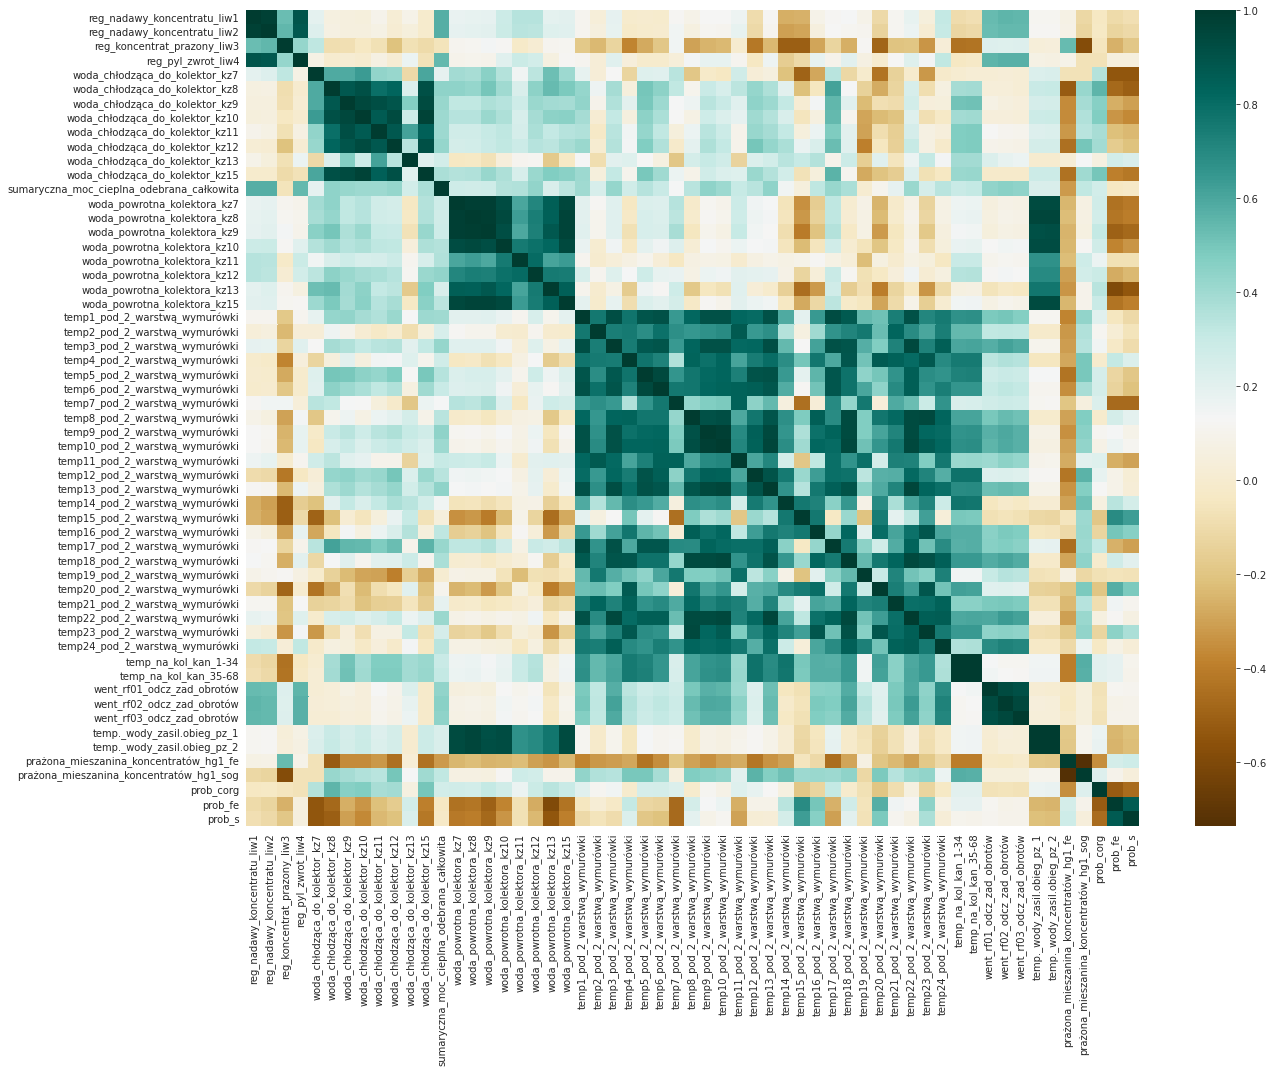

In [7]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap="BrBG")

<AxesSubplot:>

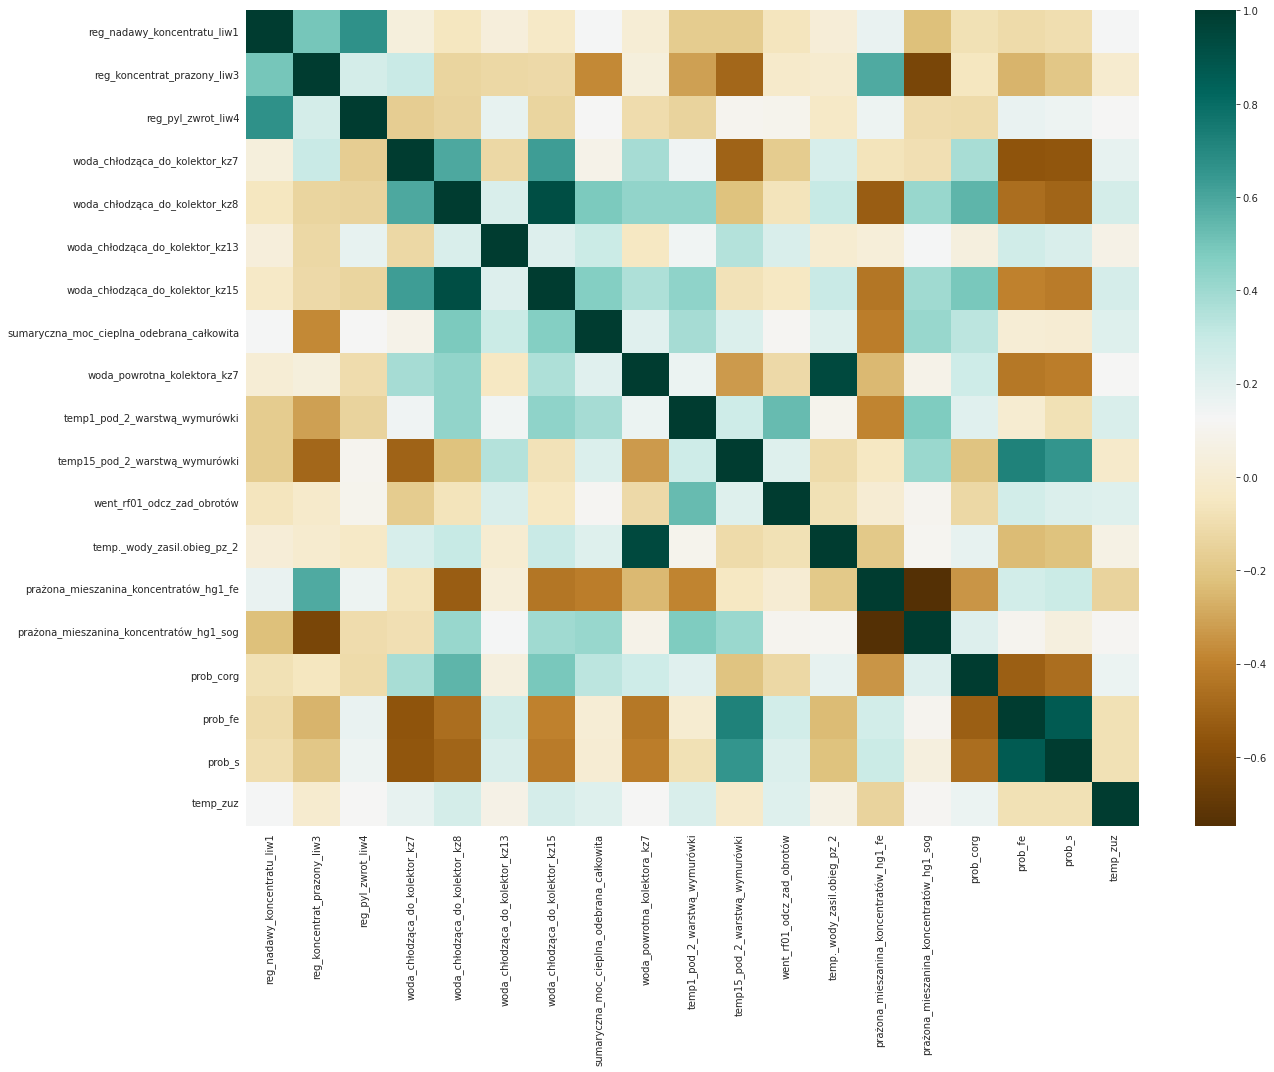

In [8]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_merged.corr(), cmap="BrBG")

In [10]:
df.to_feather("features.fth")
df_merged.to_feather("dataset1.fth")
df_merged.to_pickle("dataset1.pkl")

czas  reg_nadawy_koncentratu_liw1  \
0      2021-06-19 00:00:00                     0.000000   
1      2021-06-19 00:01:00                     0.000000   
2      2021-06-19 00:02:00                     0.000000   
3      2021-06-19 00:03:00                     0.000000   
4      2021-06-19 00:04:00                     0.000000   
...                    ...                          ...   
702775 2020-10-10 23:55:00                    57.904065   
702776 2020-10-10 23:56:00                    58.328988   
702777 2020-10-10 23:57:00                    58.304276   
702778 2020-10-10 23:58:00                    58.789641   
702779 2020-10-10 23:59:00                    59.204887   

        reg_nadawy_koncentratu_liw2  reg_koncentrat_prazony_liw3  \
0                          0.000000                     0.000000   
1                          0.000000                     0.000000   
2                          0.000000                     0.000000   
3                          0.000000                     0.000000   
4                          0.000000                     0.000000   
...                             ...                          ...   
702775                    58.799003                    13.044253   
702776                    58.926944                    12.943039   
702777                    58.726701                    12.925248   
702778                    59.024029                    12.994468   
702779                    58.465755                    13.074968   

        reg_pyl_zwrot_liw4  woda_chłodząca_do_kolektor_kz7  \
0                 0.000000                      105.580759   
1                 0.000000                      105.602960   
2                 0.000000                      105.572628   
3                 0.000000                      105.563041   
4                 0.000000                      105.770599   
...                    ...                             ...   
702775           26.107262                      109.321187   
702776           26.233921                      109.373125   
702777           25.960969                      109.407916   
702778           25.864476                      109.374936   
702779           26.409514                      109.399950   

        woda_chłodząca_do_kolektor_kz8  woda_chłodząca_do_kolektor_kz9  \
0                           112.547680                      111.656857   
1                           112.595258                      111.689973   
2                           112.643604                      111.758686   
3                           112.576620                      111.727977   
4                           112.713778                      111.659515   
...                                ...                             ...   
702775                      112.401840                      110.469446   
702776                      112.297401                      110.547077   
702777                      112.254479                      110.560027   
702778                      112.288999                      110.545975   
702779                      112.287663                      110.473485   

        woda_chłodząca_do_kolektor_kz10  woda_chłodząca_do_kolektor_kz11  ...  \
0                            112.099306                       110.952882  ...   
1                            111.998860                       111.022155  ...   
2                            112.030544                       111.003704  ...   
3                            112.029726                       111.055999  ...   
4                            112.120123                       111.099075  ...   
...                                 ...                              ...  ...   
702775                       109.113625                       109.891744  ...   
702776                       109.057108                       110.026888  ...   
702777                       109.048996                       109.952809  ...   
702778                       109.068617             

<AxesSubplot:xlabel='czas'>

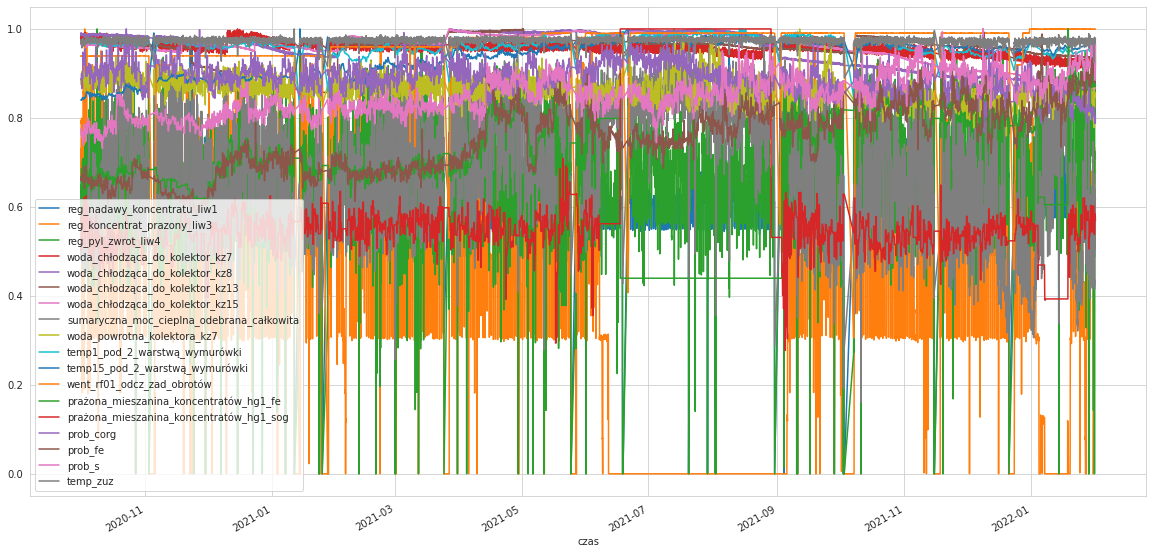

In [ ]:
# df_merged.plot(x="czas", figsize=(20,10))
for c in df_merged.columns:
    if c == "czas":
        continue
    df_merged[c] = df_merged[c]/df_merged[c].max()
df_merged.plot(x="czas", figsize=(20,10))